This notebook is written by <a href="https://sites.google.com/a/uw.edu/abadi/">Shima Abadi</a> in June 2022.
In this notebook, I show how to use <a href="https://ooipy.readthedocs.io/en/latest/index.html">OOIPY</a>  to read, plot, and process OOI hydrophone data. 

In [1]:
import ooipy
import matplotlib.pyplot as plt
import datetime

# **Download Low-frequency (Fs=200 Hz) Data from OOI**

You ned to choose a note from this list:

For low-frequency hydrophones (Fs = 200 Hz):
- 'Axial_Base'
- 'Central_Caldera'
- 'Eastern_Caldera'  
- 'Southern_Hydrate'
- 'Slope_Base'

You also need to have a starttime and endtime in this format (yy,m,d,hh,min,sec)

In [31]:
starttime = datetime.datetime(2019,2,3,13,0,0)
endtime = datetime.datetime(2019,2,3,13,15,0)
node = 'Axial_Base'
data_trace = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True, zero_mean=True)

In [13]:
data_trace

OO.AXBA1.AXBA1.HDH | 2019-02-03T13:00:00.000000Z - 2019-02-03T13:15:00.000000Z | 200.0 Hz, 180001 samples

In [14]:
print(data_trace.stats)

         network: OO
         station: AXBA1
        location: AXBA1
         channel: HDH
       starttime: 2019-02-03T13:00:00.000000Z
         endtime: 2019-02-03T13:15:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 180001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 179, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 733184})


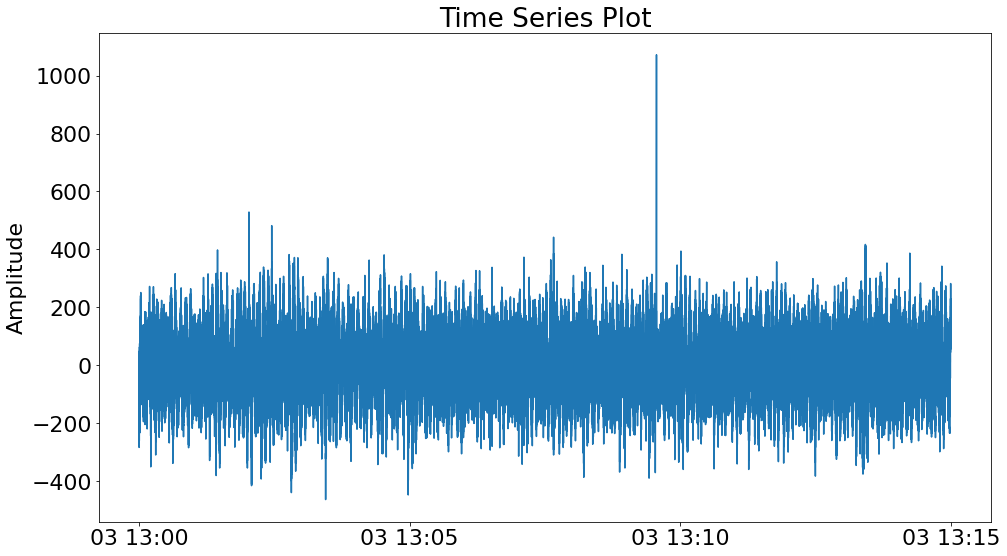

In [15]:
ooipy.plot(data_trace)

## **Filter Data**

You can bandpass filter data between fmin (in Hz) and fmax (in Hz).

In [29]:
data_trace_filter = ooipy.get_acoustic_data_LF(starttime, endtime, node, fmin = 15, fmax = 35, verbose=True, zero_mean=True)

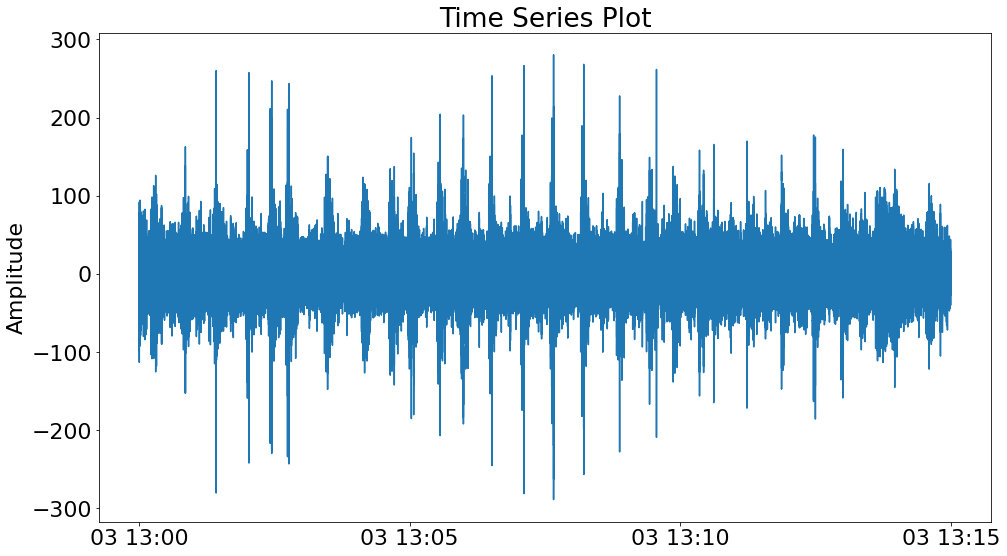

In [30]:
ooipy.plot(data_trace_filter)

**Computing and Plotting Spectrograms**

More info about the parameteres can be found <a href="https://ooipy.readthedocs.io/en/latest/hydrophone.html?highlight=compute_spectrogram#ooipy.hydrophone.basic.HydrophoneData.compute_spectrogram">here</a>   

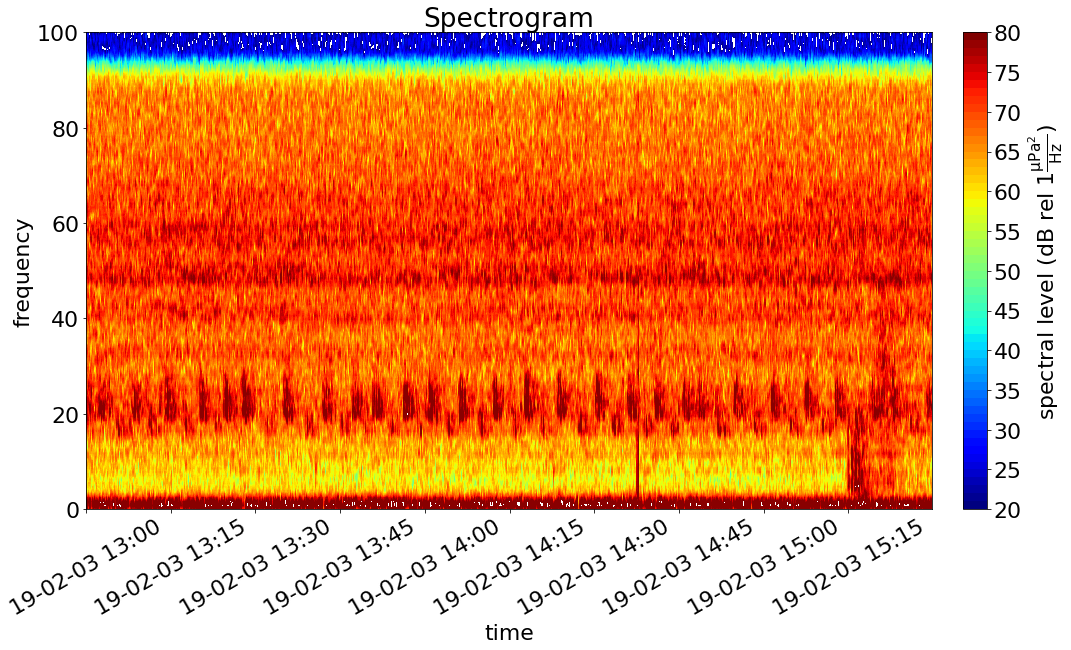

In [28]:
spec = data_trace.compute_spectrogram(L = 256,avg_time=None, overlap=0.9)
ooipy.plot(spec, fmin=0, fmax=100, xlabel_rot=30)

# **Download OOI Broadband (Fs=64000 Hz) Data **

You ned to choose a note from this list:

For broadband hydrophones (Fs = 64000 Hz):
- 'LJ01D' for Oregon Shelf Base Seafloor
- 'LJ01A' for Oregon Slope Base Seafloor
- 'PC01A' for Slope Base Shallow Profiler
- 'PC03A' for Axial Base Shallow Profiler
- 'LJ01C' for Offshore Base Seafloor
- 'LJ03A' for Axial Base Seafloor

You also need to have a starttime and endtime in this format (yy,m,d,hh,min,sec)

In [52]:
start_time = datetime.datetime(2019,1,12,3,0,0)
end_time = datetime.datetime(2019,1,12,3,1,0)
node = 'LJ01C'
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node, verbose=True)

Fetching URLs...
Sorting valid URLs for Time Window...


In [47]:
print(hdata_broadband.stats)

         network: OO
         station: HYEA1
        location: LJ01C
         channel: YDH
       starttime: 2019-01-11T23:59:59.999999Z
         endtime: 2019-01-12T00:14:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 57600001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9115, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37335040})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2019, 1, 12, 0, 15)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2019, 1, 12, 0, 0))']


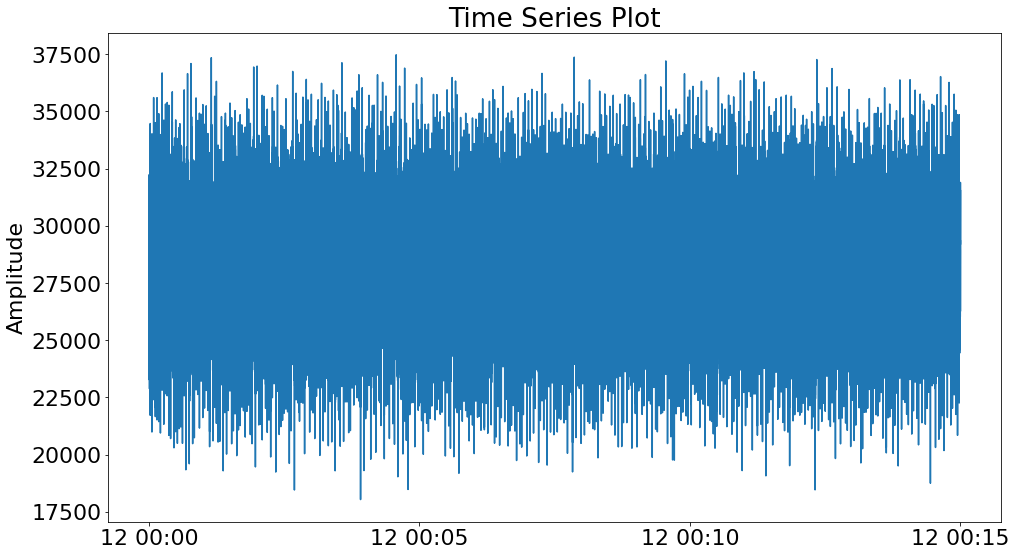

In [48]:
ooipy.plot(hdata_broadband)

/opt/anaconda3/lib/python3.7/site-packages/ooipy/tools/ooiplotlib.py:226: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_time', 'res_reduction_freq', 'dpi', 'fontsize', 'extend_type', 'logy'
  **kwargs


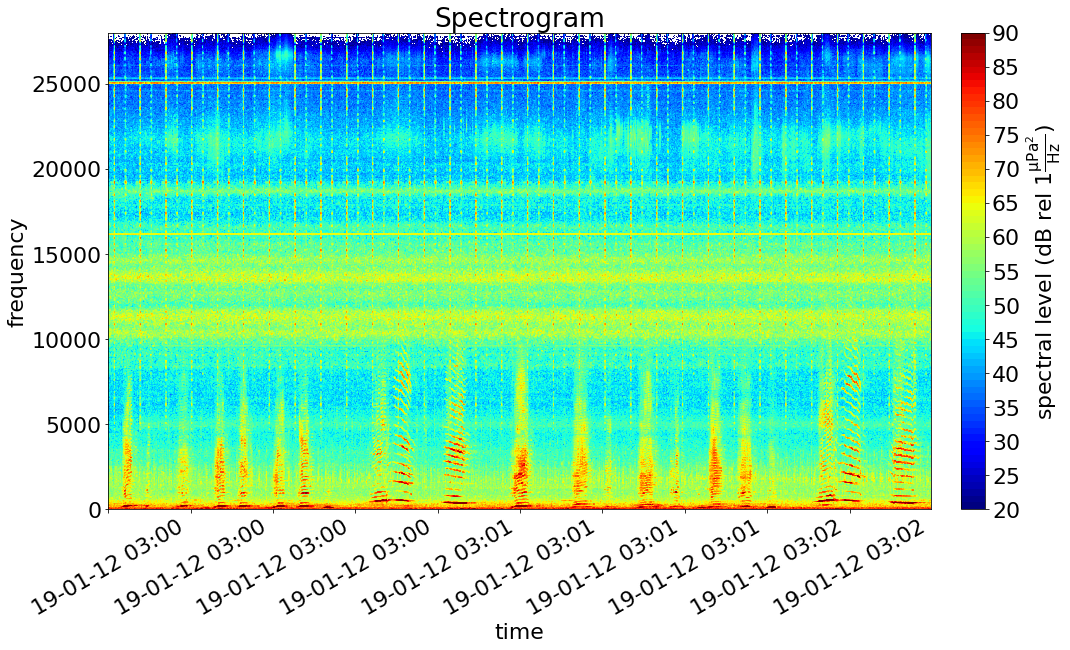

In [55]:
spec1 = hdata_broadband.compute_spectrogram(avg_time=None, overlap=0.6)
ooipy.plot(spec1, fmin=0, fmax=28000, xlabel_rot=30,vmax=90)